# TRANSFER LEARNING

In [1]:
from tensorflow import keras

In [2]:
pip show tensorflow

Name: tensorflowNote: you may need to restart the kernel to use updated packages.

Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\nikhi\anaconda3\Lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, termcolor, typing-extensions, wrapt
Required-by: 


In [3]:
pip show keras

Name: keras
Version: 3.10.0
Summary: Multi-backend Keras
Home-page: 
Author: 
Author-email: Keras team <keras-users@googlegroups.com>
License: Apache License 2.0
Location: C:\Users\nikhi\anaconda3\Lib\site-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow
Note: you may need to restart the kernel to use updated packages.


In [6]:
import tensorflow.keras as keras

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img, image_dataset_from_directory

# Data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

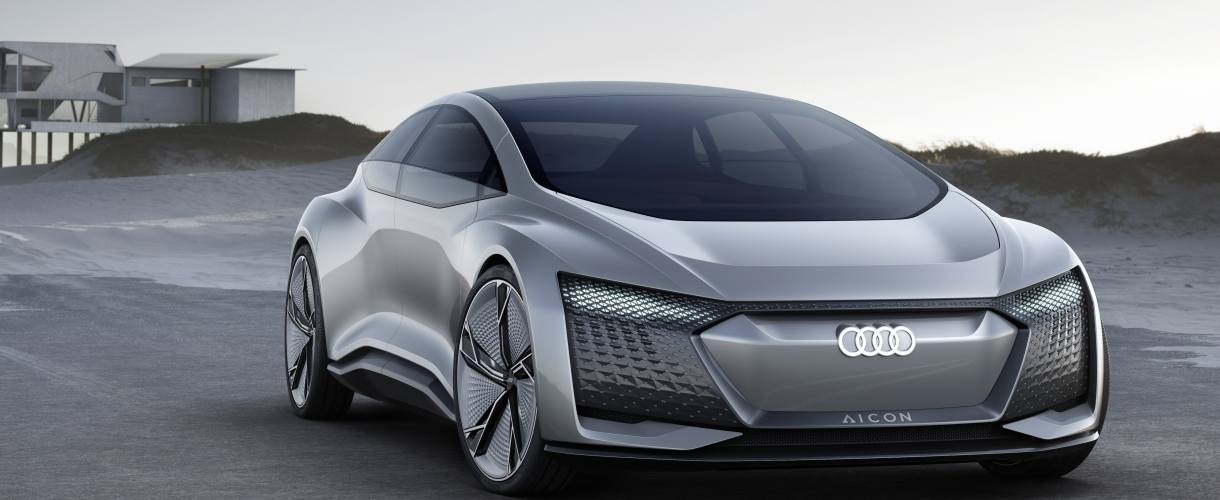

In [9]:
img = load_img(r"C:\Users\nikhi\PycharmProjects\NARESH_IT\12_NARESH_IT_DEEP_LEARNING\Naresh_IT_12_04_TransferLearning\25999-AudiUK00017478FastforwardedbyAudi.jpg")

img

In [10]:
x = img_to_array(img) # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape) # this is a Numpy array with shape (1, 3, 150)
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=r"C:\Users\nikhi\PycharmProjects\NARESH_IT\12_NARESH_IT_DEEP_LEARNING\Naresh_IT_12_04_TransferLearning\DataArgs\DataArgs_Nearest", save_prefix='cat', save_format='jpeg'):
     i += 1
     if i > 30:
         break # otherwise the generator would loop indefinitely

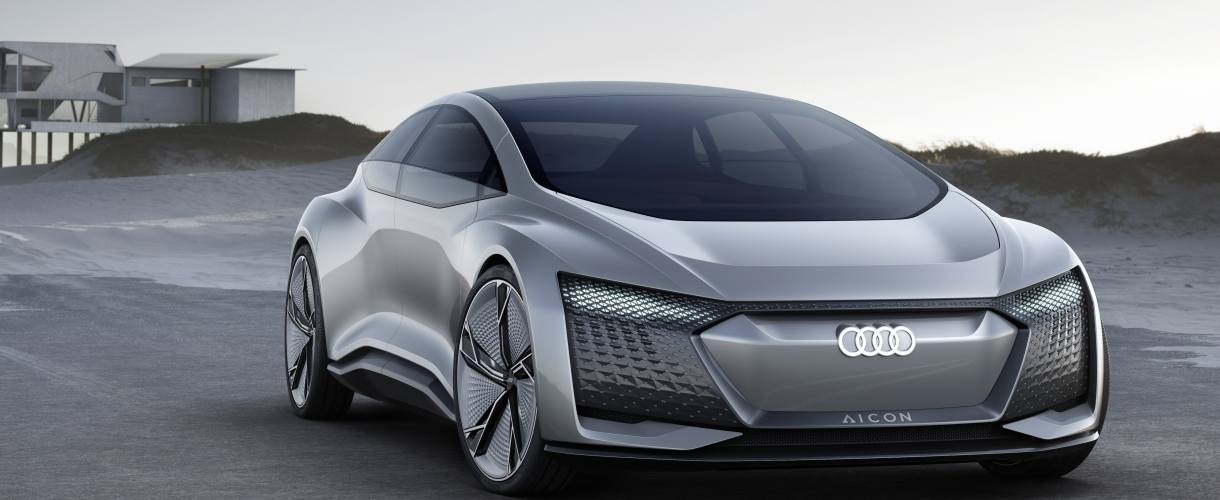

In [11]:
from tensorflow.keras.utils import image_dataset_from_directory
from keras.utils import array_to_img ,img_to_array, load_img

datagen = ImageDataGenerator(
     rotation_range=40,
     width_shift_range=0.2,
     height_shift_range=0.2,
     shear_range=0.2,
     zoom_range=0.2,
     horizontal_flip=True,
     fill_mode='reflect')

img = load_img(r"C:\Users\nikhi\PycharmProjects\NARESH_IT\12_NARESH_IT_DEEP_LEARNING\Naresh_IT_12_04_TransferLearning\25999-AudiUK00017478FastforwardedbyAudi.jpg")
img

In [12]:
x = img_to_array(img) # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape) # this is a Numpy array with shape (1, 3, 150,␣150)
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=r"C:\Users\nikhi\PycharmProjects\NARESH_IT\12_NARESH_IT_DEEP_LEARNING\Naresh_IT_12_04_TransferLearning\DataArgs\DataArgs_Reflect", save_prefix='cat', save_format='jpeg'):
   i += 1
   if i > 30:
        break # otherwise the generator would loop indefinitely

In [13]:
keras.applications.ResNet50(
       include_top=True,
       weights="imagenet",
       input_tensor=None,
       input_shape=None,
       pooling=None,
       classes=1000,
       classifier_activation="softmax",
)

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 28s 0us/step


<Functional name=resnet50, built=True>

# Basic Predictions of the Image

## RESTNET50

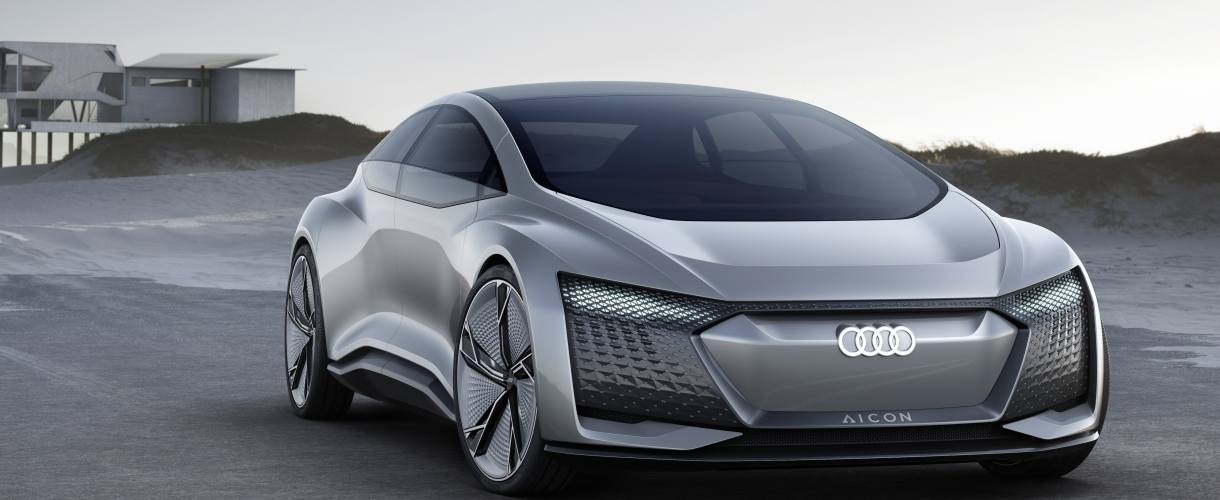

In [14]:
from keras.utils import array_to_img ,img_to_array, load_img
img = load_img(r"C:\Users\nikhi\PycharmProjects\NARESH_IT\12_NARESH_IT_DEEP_LEARNING\Naresh_IT_12_04_TransferLearning\25999-AudiUK00017478FastforwardedbyAudi.jpg")
img

In [17]:
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input,decode_predictions
from tensorflow.keras.preprocessing import image

# Load the ResNet-50 model pre-trained on ImageNet data
model = ResNet50(weights='imagenet')

# Load and preprocess the input image
img_path = r"C:\Users\nikhi\PycharmProjects\NARESH_IT\12_NARESH_IT_DEEP_LEARNING\Naresh_IT_12_04_TransferLearning\25999-AudiUK00017478FastforwardedbyAudi.jpg" 
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)
 
# Decode and print the top-3 predicted classes
decoded_predictions = decode_predictions(predictions, top=3)[0]

print("Predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
     print(f"{i + 1}: {label} ({score:.2f})")
 
# Optionally, you can obtain the class index for the top prediction
top_class_index = np.argmax(predictions[0])
print(f"\nTop Prediction Class Index: {top_class_index}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 972ms/step
Predictions:
1: sports_car (0.39)
2: minivan (0.38)
3: grille (0.12)

Top Prediction Class Index: 817


## RESTNET50V2

In [18]:
import numpy as np
from tensorflow.keras.applications.resnet_v2 import ResNet50V2,preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
 
# Load the ResNet50V2 model pre-trained on ImageNet data
model = ResNet50V2(weights='imagenet')
 
# Load and preprocess the input image
img_path = r"C:\Users\nikhi\PycharmProjects\NARESH_IT\12_NARESH_IT_DEEP_LEARNING\Naresh_IT_12_04_TransferLearning\25999-AudiUK00017478FastforwardedbyAudi.jpg"

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)

# Decode and print the top-3 predicted classes
decoded_predictions = decode_predictions(predictions, top=3)[0]
 
print("Predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
          print(f"{i + 1}: {label} ({score:.2f})")
 
# Optionally, you can obtain the class index for the top prediction
top_class_index = np.argmax(predictions[0])
print(f"\nTop Prediction Class Index: {top_class_index}")

102869336/102869336 ━━━━━━━━━━━━━━━━━━━━ 29s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predictions:
1: sports_car (0.89)
2: grille (0.09)
3: racer (0.01)

Top Prediction Class Index: 817


## VGG16

In [19]:
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input,decode_predictions
from tensorflow.keras.preprocessing import image

# Load the VGG16 model pre-trained on ImageNet data
model = VGG16(weights='imagenet')
 
# Load and preprocess the input image
img_path = r"C:\Users\nikhi\PycharmProjects\NARESH_IT\12_NARESH_IT_DEEP_LEARNING\Naresh_IT_12_04_TransferLearning\25999-AudiUK00017478FastforwardedbyAudi.jpg"

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)

# Decode and print the top-3 predicted classes
decoded_predictions = decode_predictions(predictions, top=3)[0]

print("Predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
             print(f"{i + 1}: {label} ({score:.2f})")
 
# Optionally, you can obtain the class index for the top prediction
top_class_index = np.argmax(predictions[0])
print(f"\nTop Prediction Class Index: {top_class_index}")

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 151s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
Predictions:
1: minivan (0.52)
2: sports_car (0.21)
3: crash_helmet (0.05)

Top Prediction Class Index: 656


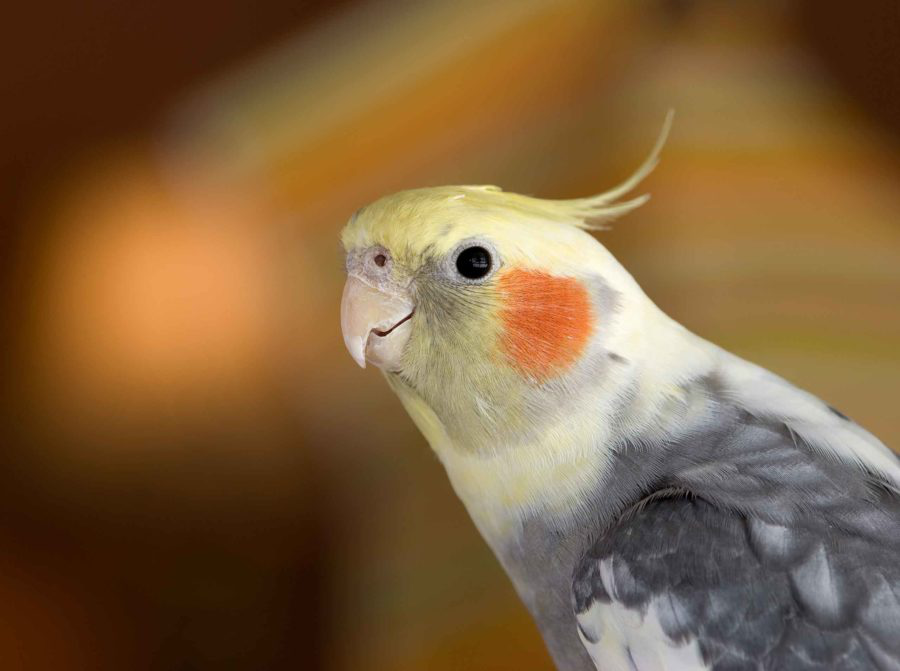

In [21]:
from keras.utils import array_to_img ,img_to_array, load_img
img = load_img(r"C:\Users\nikhi\PycharmProjects\NARESH_IT\12_NARESH_IT_DEEP_LEARNING\Naresh_IT_12_04_TransferLearning\care_sheet_cockatiel-2-900x671.jpg")
img

In [23]:
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input,decode_predictions
from tensorflow.keras.preprocessing import image
 
# Load the VGG16 model pre-trained on ImageNet data
model = VGG16(weights='imagenet')
 
# Load and preprocess the input image
img_path = r"C:\Users\nikhi\PycharmProjects\NARESH_IT\12_NARESH_IT_DEEP_LEARNING\Naresh_IT_12_04_TransferLearning\care_sheet_cockatiel-2-900x671.jpg"

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
 
# Make predictions
predictions = model.predict(img_array)
 
# Decode and print the top-3 predicted classes
decoded_predictions = decode_predictions(predictions, top=3)[0]
 
print("Predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
         print(f"{i + 1}: {label} ({score:.2f})")
 
# Optionally, you can obtain the class index for the top prediction
top_class_index = np.argmax(predictions[0])
print(f"\nTop Prediction Class Index: {top_class_index}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
Predictions:
1: African_grey (0.44)
2: macaw (0.23)
3: goldfish (0.10)

Top Prediction Class Index: 87


## VGG19

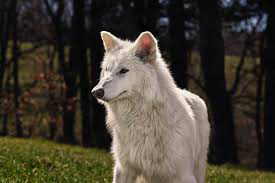

In [24]:
from keras.utils import array_to_img ,img_to_array, load_img
img = load_img(r"C:\Users\nikhi\PycharmProjects\NARESH_IT\12_NARESH_IT_DEEP_LEARNING\Naresh_IT_12_04_TransferLearning\images.jpeg")
img

In [25]:
import numpy as np
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input,decode_predictions
from tensorflow.keras.preprocessing import image

# Load the VGG19 model pre-trained on ImageNet data
model = VGG19(weights='imagenet')

# Load and preprocess the input image
img_path = r"C:\Users\nikhi\PycharmProjects\NARESH_IT\12_NARESH_IT_DEEP_LEARNING\Naresh_IT_12_04_TransferLearning\images.jpeg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
 
# Make predictions
predictions = model.predict(img_array)
 
# Decode and print the top-3 predicted classes
decoded_predictions = decode_predictions(predictions, top=3)[0]
 
print("Predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
           print(f"{i + 1}: {label} ({score:.2f})")

# Optionally, you can obtain the class index for the top prediction
top_class_index = np.argmax(predictions[0])
print(f"\nTop Prediction Class Index: {top_class_index}")

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 153s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
Predictions:
1: white_wolf (0.83)
2: timber_wolf (0.15)
3: Eskimo_dog (0.00)

Top Prediction Class Index: 270
